In [ ]:
import numpy as np
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

In [ ]:
def split_sequence(sequence,steps):
  X,y=list(),list()
  for start in range(len(sequence)):
    end_index = start + steps
    if end_index > len(sequence)-1:
      break
    sequence_x,sequence_y = sequence[start : end_index], sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X),array(y)

In [ ]:
df = pd.read_csv("/content/nestle.csv")
df.head()

,Date,Open Price,High_Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-Apr-22,18150.00,18572.95,17772.90,18205.80,18130.18344,4590,1770,83217542,950.0,20.70,800.05,55.80
1,20-Apr-22,18100.10,18415.00,18017.15,18313.70,18295.55907,6069,1321,111035748,4677.0,77.06,397.85,213.60
2,19-Apr-22,18470.05,18718.00,17845.60,17943.15,18355.09332,2904,716,53303191,1619.0,55.75,872.40,-526.90
3,18-Apr-22,18294.50,18684.50,18294.50,18549.85,18511.22460,1496,586,27692792,557.0,37.23,390.00,255.35
4,13-Apr-22,18371.20,18549.30,18248.25,18343.90,18388.96783,1150,550,21147313,573.0,49.83,301.05,-27.30


In [ ]:
def exp8(col_name):
    raw_sequence = df[col_name]
    # choose the number of time steps
    steps = 3
    # split into samples
    X, y = split_sequence(raw_sequence, steps)
    return X, y

In [ ]:
X_data, y_data = exp8('High_Price')

print('The input sequence on which we will test our CNN Model: ')
print(df['High_Price'])
print("\n\n****************************************************************")
print('The features (X), lagged values of the time series, for our CNN Model')
print(X_data[:5])
print("\n\n****************************************************************")
print('The respective observed values (y) of the sequence for training in the CNN Model')
print(y_data)
print("****************************************************************\n\n")

# Reshape 2D input data to 3D input data
features = 1
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], features))

print('After reshaping, the shape of the input X')
print(X_data.shape)
print("\n\n*************************************************")
print("*************************************************")
print('The final form of input feature matrix X')
print(X_data[:5])
print("\n\n*************************************************")
print("*************************************************")
print('Feature matrix X is ready for input to the CNN Model')
print("*************************************************\n\n")

# Defining model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_data, y_data, epochs=100, verbose=1)

# Predict
x_input = array(df['High_Price'][-steps:])
x_input = x_input.reshape((1, steps, features))
y_pred = model.predict(x_input, verbose=0)

print("*************************************************")
print("The next predicted value is ")
print(y_pred)
print("The next true value is ")
print(df['High_Price'].iloc[-1])
print("*************************************************")

The input sequence on which we will test our CNN Model: 
0       18572.95
1       18415.00
2       18718.00
3       18684.50
4       18549.30
          ...   
2548     4160.00
2549     4126.90
2550     4125.00
2551     4110.10
2552     4139.90
Name: High_Price, Length: 2553, dtype: float64


****************************************************************
The features (X), lagged values of the time series, for our CNN Model
[[18572.95 18415.   18718.  ]
 [18415.   18718.   18684.5 ]
 [18718.   18684.5  18549.3 ]
 [18684.5  18549.3  18497.  ]
 [18549.3  18497.   18518.35]]


****************************************************************
The respective observed values (y) of the sequence for training in the CNN Model
[18684.5 18549.3 18497.  ...  4125.   4110.1  4139.9]
****************************************************************


After reshaping, the shape of the input X
(2550, 3, 1)


*************************************************
*********************************************

In [ ]:
exp8("High_Price")

(array([[18572.95, 18415.  , 18718.  ],
        [18415.  , 18718.  , 18684.5 ],
        [18718.  , 18684.5 , 18549.3 ],
        ...,
        [ 4146.95,  4160.  ,  4126.9 ],
        [ 4160.  ,  4126.9 ,  4125.  ],
        [ 4126.9 ,  4125.  ,  4110.1 ]]),
 array([18684.5, 18549.3, 18497. , ...,  4125. ,  4110.1,  4139.9]))

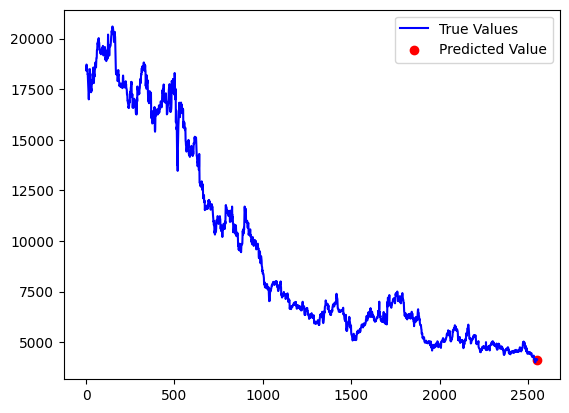

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['High_Price'], label='True Values', color='blue')
plt.scatter(len(df['High_Price']) - 1, y_pred, label='Predicted Value', color='red')
plt.legend()
plt.show()

In [ ]:
exp8("Open Price")

(array([[18150.  , 18100.1 , 18470.05],
        [18100.1 , 18470.05, 18294.5 ],
        [18470.05, 18294.5 , 18371.2 ],
        ...,
        [ 4099.8 ,  4114.  ,  4118.  ],
        [ 4114.  ,  4118.  ,  4100.  ],
        [ 4118.  ,  4100.  ,  4061.  ]]),
 array([18294.5, 18371.2, 18339. , ...,  4100. ,  4061. ,  4139.9]))

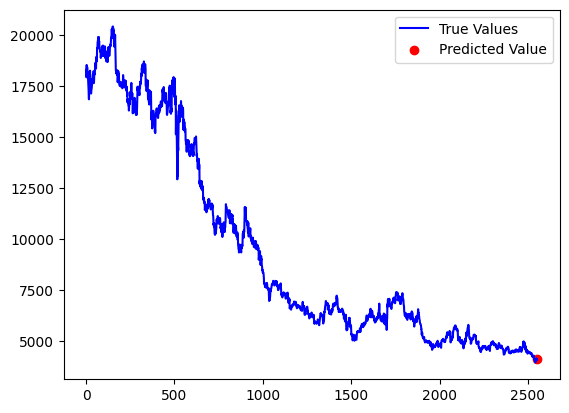

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Close Price'], label='True Values', color='blue')
plt.scatter(len(df['Close Price']) - 1, y_pred, label='Predicted Value', color='red')
plt.legend()
plt.show()

In [ ]:
exp8("Close Price")

(array([[18205.8 , 18313.7 , 17943.15],
        [18313.7 , 17943.15, 18549.85],
        [17943.15, 18549.85, 18343.9 ],
        ...,
        [ 4125.  ,  4143.25,  4101.85],
        [ 4143.25,  4101.85,  4120.6 ],
        [ 4101.85,  4120.6 ,  4095.35]]),
 array([18549.85, 18343.9 , 18430.  , ...,  4120.6 ,  4095.35,  4070.35]))

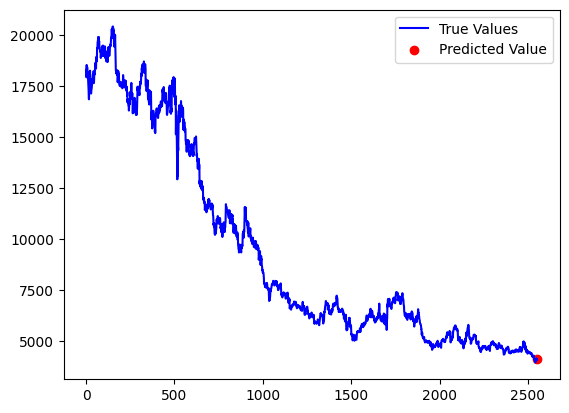

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Close Price'], label='True Values', color='blue')
plt.scatter(len(df['Close Price']) - 1, y_pred, label='Predicted Value', color='red')
plt.legend()
plt.show()

In [ ]:
exp8("WAP")

(array([[18130.18344 , 18295.55907 , 18355.09332 ],
        [18295.55907 , 18355.09332 , 18511.2246  ],
        [18355.09332 , 18511.2246  , 18388.96783 ],
        ...,
        [ 4128.345238,  4129.486321,  4106.848723],
        [ 4129.486321,  4106.848723,  4105.106055],
        [ 4106.848723,  4105.106055,  4091.474315]]),
 array([18511.2246  , 18388.96783 , 18390.222   , ...,  4105.106055,
         4091.474315,  4085.640979]))

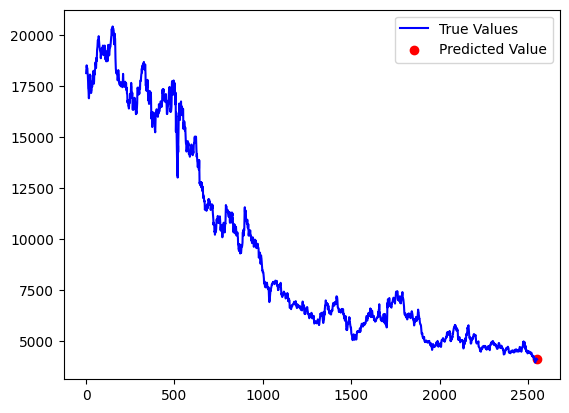

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['WAP'], label='True Values', color='blue')
plt.scatter(len(df['WAP']) - 1, y_pred, label='Predicted Value', color='red')
plt.legend()
plt.show()

In [ ]:
exp8("No. of Trades")

(array([[1770, 1321,  716],
        [1321,  716,  586],
        [ 716,  586,  550],
        ...,
        [  38,  444,  270],
        [ 444,  270,  247],
        [ 270,  247,  886]]),
 array([ 586,  550,  537, ...,  247,  886, 1132]))

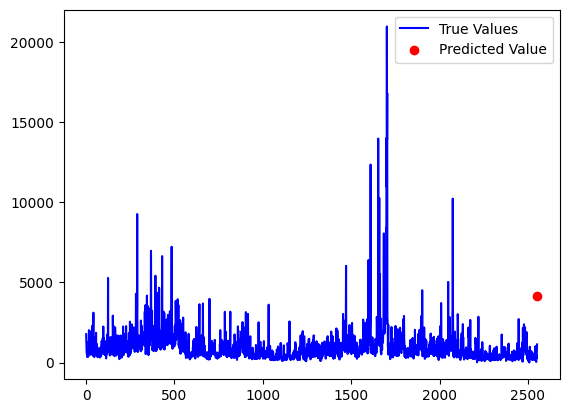

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['No. of Trades'], label='True Values', color='blue')
plt.scatter(len(df['No. of Trades']) - 1, y_pred, label='Predicted Value', color='red')
plt.legend()
plt.show()

In [ ]:
exp8("Total Turnover (Rs.)")

(array([[ 83217542, 111035748,  53303191],
        [111035748,  53303191,  27692792],
        [ 53303191,  27692792,  21147313],
        ...,
        [   346781,  12830314,   4180772],
        [ 12830314,   4180772,  11728288],
        [  4180772,  11728288,  20469646]]),
 array([27692792, 21147313, 36780444, ..., 11728288, 20469646, 31704574]))

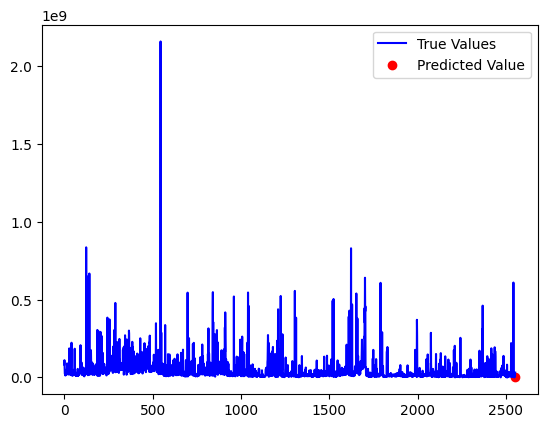

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Total Turnover (Rs.)'], label='True Values', color='blue')
plt.scatter(len(df['Total Turnover (Rs.)']) - 1, y_pred, label='Predicted Value', color='red')
plt.legend()
plt.show()

In [ ]:
exp8("Deliverable Quantity")

(array([[ 950., 4677., 1619.],
        [4677., 1619.,  557.],
        [1619.,  557.,  573.],
        ...,
        [  44., 2069.,  357.],
        [2069.,  357., 2312.],
        [ 357., 2312., 2817.]]),
 array([ 557.,  573., 1412., ..., 2312., 2817., 5776.]))

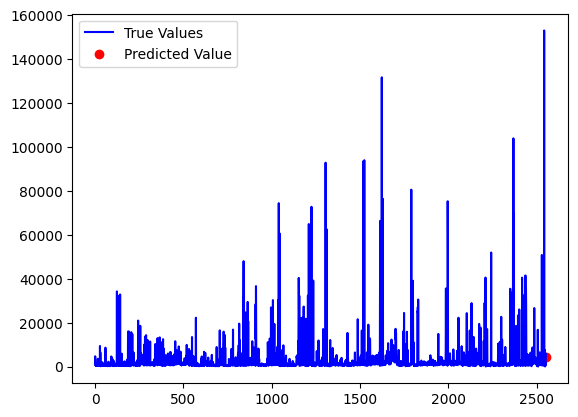

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Deliverable Quantity'], label='True Values', color='blue')
plt.scatter(len(df['Deliverable Quantity']) - 1, y_pred, label='Predicted Value', color='red')
plt.legend()
plt.show()

In [ ]:
exp8("% Deli. Qty to Traded Qty")

(array([[20.7 , 77.06, 55.75],
        [77.06, 55.75, 37.23],
        [55.75, 37.23, 49.83],
        ...,
        [52.38, 66.59, 35.07],
        [66.59, 35.07, 80.92],
        [35.07, 80.92, 56.31]]),
 array([37.23, 49.83, 70.6 , ..., 80.92, 56.31, 74.43]))

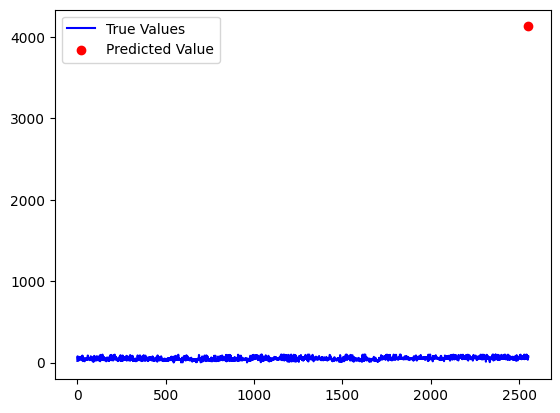

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['% Deli. Qty to Traded Qty'], label='True Values', color='blue')
plt.scatter(len(df['% Deli. Qty to Traded Qty']) - 1, y_pred, label='Predicted Value', color='red')
plt.legend()
plt.show()

In [ ]:
exp8("Spread High-Low")

(array([[800.05, 397.85, 872.4 ],
        [397.85, 872.4 , 390.  ],
        [872.4 , 390.  , 301.05],
        ...,
        [ 47.15,  84.  ,  46.9 ],
        [ 84.  ,  46.9 ,  43.6 ],
        [ 46.9 ,  43.6 ,  50.  ]]),
 array([390.  , 301.05, 280.7 , ...,  43.6 ,  50.  ,  95.9 ]))

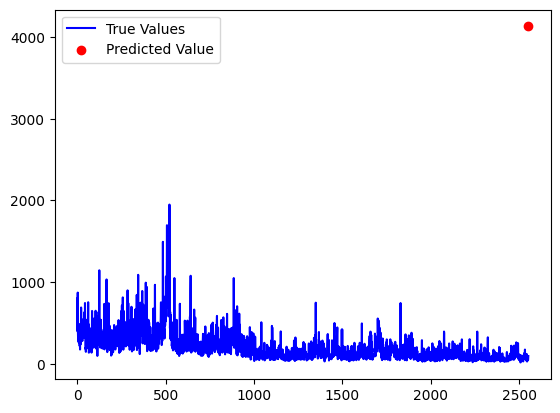

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Spread High-Low'], label='True Values', color='blue')
plt.scatter(len(df['Spread High-Low']) - 1, y_pred, label='Predicted Value', color='red')
plt.legend()
plt.show()

In [ ]:
exp8("Spread Close-Open")

(array([[  55.8 ,  213.6 , -526.9 ],
        [ 213.6 , -526.9 ,  255.35],
        [-526.9 ,  255.35,  -27.3 ],
        ...,
        [  25.2 ,   29.25,  -16.15],
        [  29.25,  -16.15,   20.6 ],
        [ -16.15,   20.6 ,   34.35]]),
 array([255.35, -27.3 ,  91.  , ...,  20.6 ,  34.35, -69.55]))

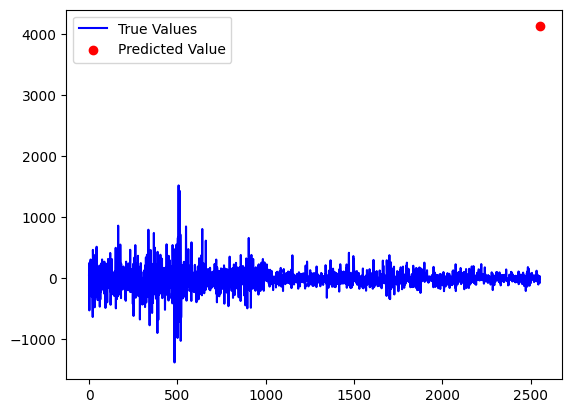

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Spread Close-Open'], label='True Values', color='blue')
plt.scatter(len(df['Spread Close-Open']) - 1, y_pred, label='Predicted Value', color='red')
plt.legend()
plt.show()